# Exercise 2

## Setup

In [112]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [114]:
from sklearn.feature_selection import f_classif

In [115]:
arff_file = arff.loadarff('Diabetes.arff')

In [116]:
arff_file[1]

Dataset: diabetes
	Pregnancies's type is numeric
	Glucose's type is numeric
	BloodPressure's type is numeric
	SkinThickness's type is numeric
	Insulin's type is numeric
	BMI's type is numeric
	DiabetesPedigreeFunction's type is numeric
	Age's type is numeric
	Outcome's type is nominal, range is ('0', '1')

In [117]:
diabetes = pd.DataFrame(arff_file[0])
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'1'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'0'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'1'


In [118]:
y = diabetes["Outcome"]
X = diabetes.drop("Outcome", axis=1)

## 2.1

In [119]:
f_statistic, p_values = f_classif(X, y)
p_values

array([5.06512730e-10, 8.93543165e-43, 7.15139001e-02, 3.83477048e-02,
       2.86186460e-04, 1.22980749e-16, 1.25460701e-06, 2.20997546e-11])

In [120]:
best_idx = f_statistic.argmax()
worst_idx = f_statistic.argmin()
best_feature = X.columns[best_idx]
worst_feature = X.columns[worst_idx]

print("Best Feature:", X.columns[best_idx], f_statistic[best_idx])
print("Worst Feature:", X.columns[worst_idx], f_statistic[worst_idx])


Best Feature: Glucose 213.16175217803828
Worst Feature: BloodPressure 3.256950397889028


b'0'
b'1'


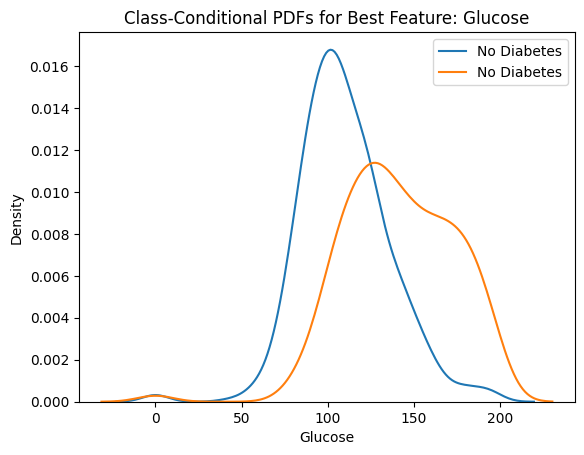

In [121]:
classes = np.unique(y)
for cls in classes:
    cls_x_best_feature = X.loc[y==cls, best_feature]
    print(cls)
    sns.kdeplot(cls_x_best_feature, label="Diabetes" if cls == 1 else "No Diabetes")

plt.title(f"Class-Conditional PDFs for Best Feature: {best_feature}")
plt.xlabel(best_feature)
plt.ylabel("Density")
plt.legend()
plt.show()

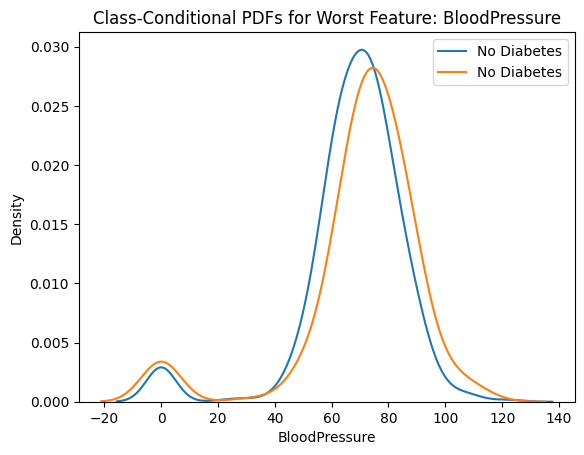

In [122]:
classes = np.unique(y)
for cls in classes:
    cls_x_worst_feature = X.loc[y==cls, worst_feature]
    sns.kdeplot(cls_x_worst_feature, label="Diabetes" if cls == 1 else "No Diabetes")

plt.title(f"Class-Conditional PDFs for Worst Feature: {worst_feature}")
plt.xlabel(worst_feature)
plt.ylabel("Density")
plt.legend()
plt.show()

## 2.2

In [123]:
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
min_samples_splits = [2, 5, 10, 20, 30, 50, 100]

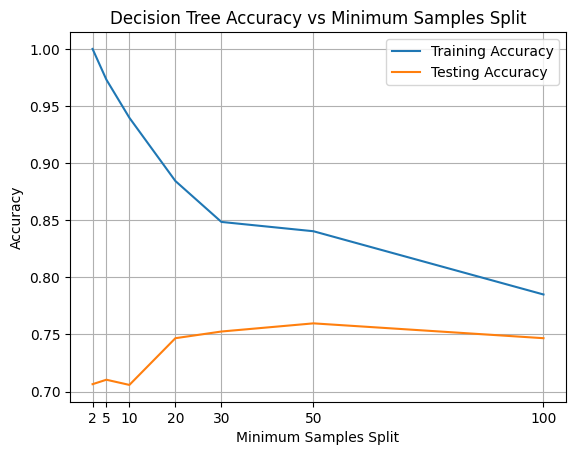

In [139]:
train_accuracies = []
test_accuracies = []

for min_samples_split in min_samples_splits:
    train_acc = []
    test_acc = []
    
    for _ in range(10):
        
        dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
        dt.fit(X_train, y_train)
        
        train_acc.append(dt.score(X_train, y_train))
        test_acc.append(dt.score(X_test, y_test))
    
    train_accuracies.append(np.mean(train_acc))
    test_accuracies.append(np.mean(test_acc))

plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Minimum Samples Split')
plt.xticks(min_samples_splits)
plt.legend()
plt.grid(True)
plt.show()

## 2.3

In [125]:
np.max(test_accuracies)

np.float64(0.7597402597402596)

In [126]:
train_accuracies[5]

np.float64(0.8403908794788274)

The train accuracy decreases as the minimum samples split increases, however the test accuracies varies differently, generally increasing and then decreasing. To achieve the best generalization capacity, the minimum samples split should be set to 50, achieving a test accuracy of 76% and a train accuracy of 84%

## 2.4

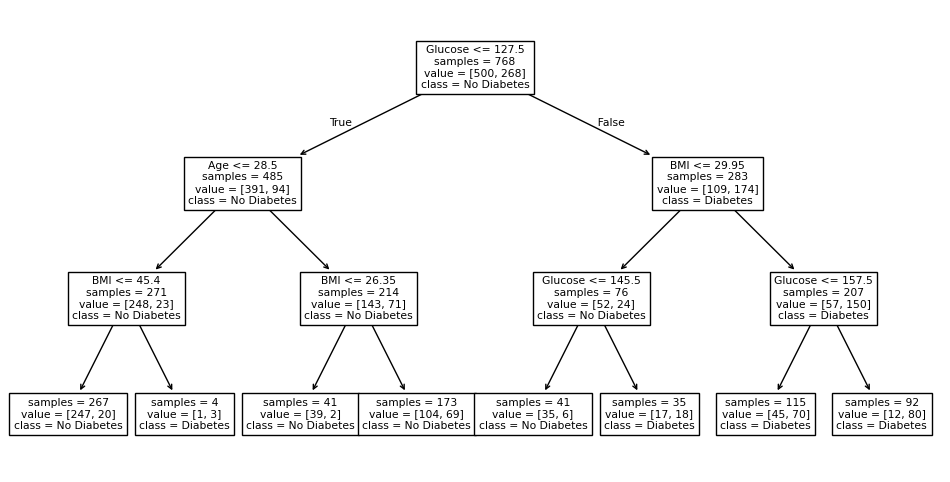

In [130]:
predictor = DecisionTreeClassifier(max_depth=3, random_state=1)
predictor.fit(X, y)

figure = plt.figure(figsize=(12, 6))
plot_tree(predictor, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], impurity=False)
plt.show()

1. Glucose level is the primary factor:

   - If Glucose <= 127.5: 18.6% chance of diabetes
   - If Glucose > 127.5: 61.6% chance of diabetes

   This shows that higher glucose levels are strongly associated with diabetes.

2. Age is a secondary factor for lower glucose levels:

   - If Glucose <= 127.5 and Age <= 28.5: 7.6% chance of diabetes
   - If Glucose <= 127.5 and Age > 28.5: 32% chance of diabetes

   For people with lower glucose levels, being older increases the chance of diabetes.

3. BMI is important across different glucose and age ranges:

   a. For younger people with lower glucose:
      - If Glucose <= 127.5, Age <= 28.5, and BMI <= 45.4: 6.7% chance of diabetes
      - If Glucose <= 127.5, Age <= 28.5, and BMI > 45.4: 66.7% chance of diabetes

   b. For older people with lower glucose:
      - If Glucose <= 127.5, Age > 28.5, and BMI <= 26.35: 3% chance of diabetes
      - If Glucose <= 127.5, Age > 28.5, and BMI > 26.35: 39.1% chance of diabetes

   c. For people with higher glucose:
      - If Glucose > 127.5 and BMI <= 29.95: 31.7% chance of diabetes
      - If Glucose > 127.5 and BMI > 29.95: 72.8% chance of diabetes

   Higher BMI is associated with a higher chance of diabetes.

4. For people with higher glucose and BMI, high glucose levels further indicates the chance of diabetes:

   - If Glucose > 127.5, BMI > 29.95, and Glucose <= 157.5: 60.9% chance of diabetes
   - If Glucose > 127.5, BMI > 29.95, and Glucose > 157.5: 85.4% chance of diabetes
